In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc 
import sys 
sys.path.append('../../src')

from spaceoracle.prophets import Prophet

2024-12-07 03:26:10.721020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/HumanMelanomaRNA.h5ad')

save_dir = '/ix/djishnu/shared/djishnu_kor11/results/melanoma'

pythia = Prophet(
    adata=adata_train,
    models_dir='/ix/djishnu/shared/djishnu_kor11/models_melanoma',
    annot='cluster_cat',
    annot_labels='cluster'
)

In [4]:
pythia.compute_betas()

100%|██████████| 1986/1986 [00:26<00:00, 74.45it/s]


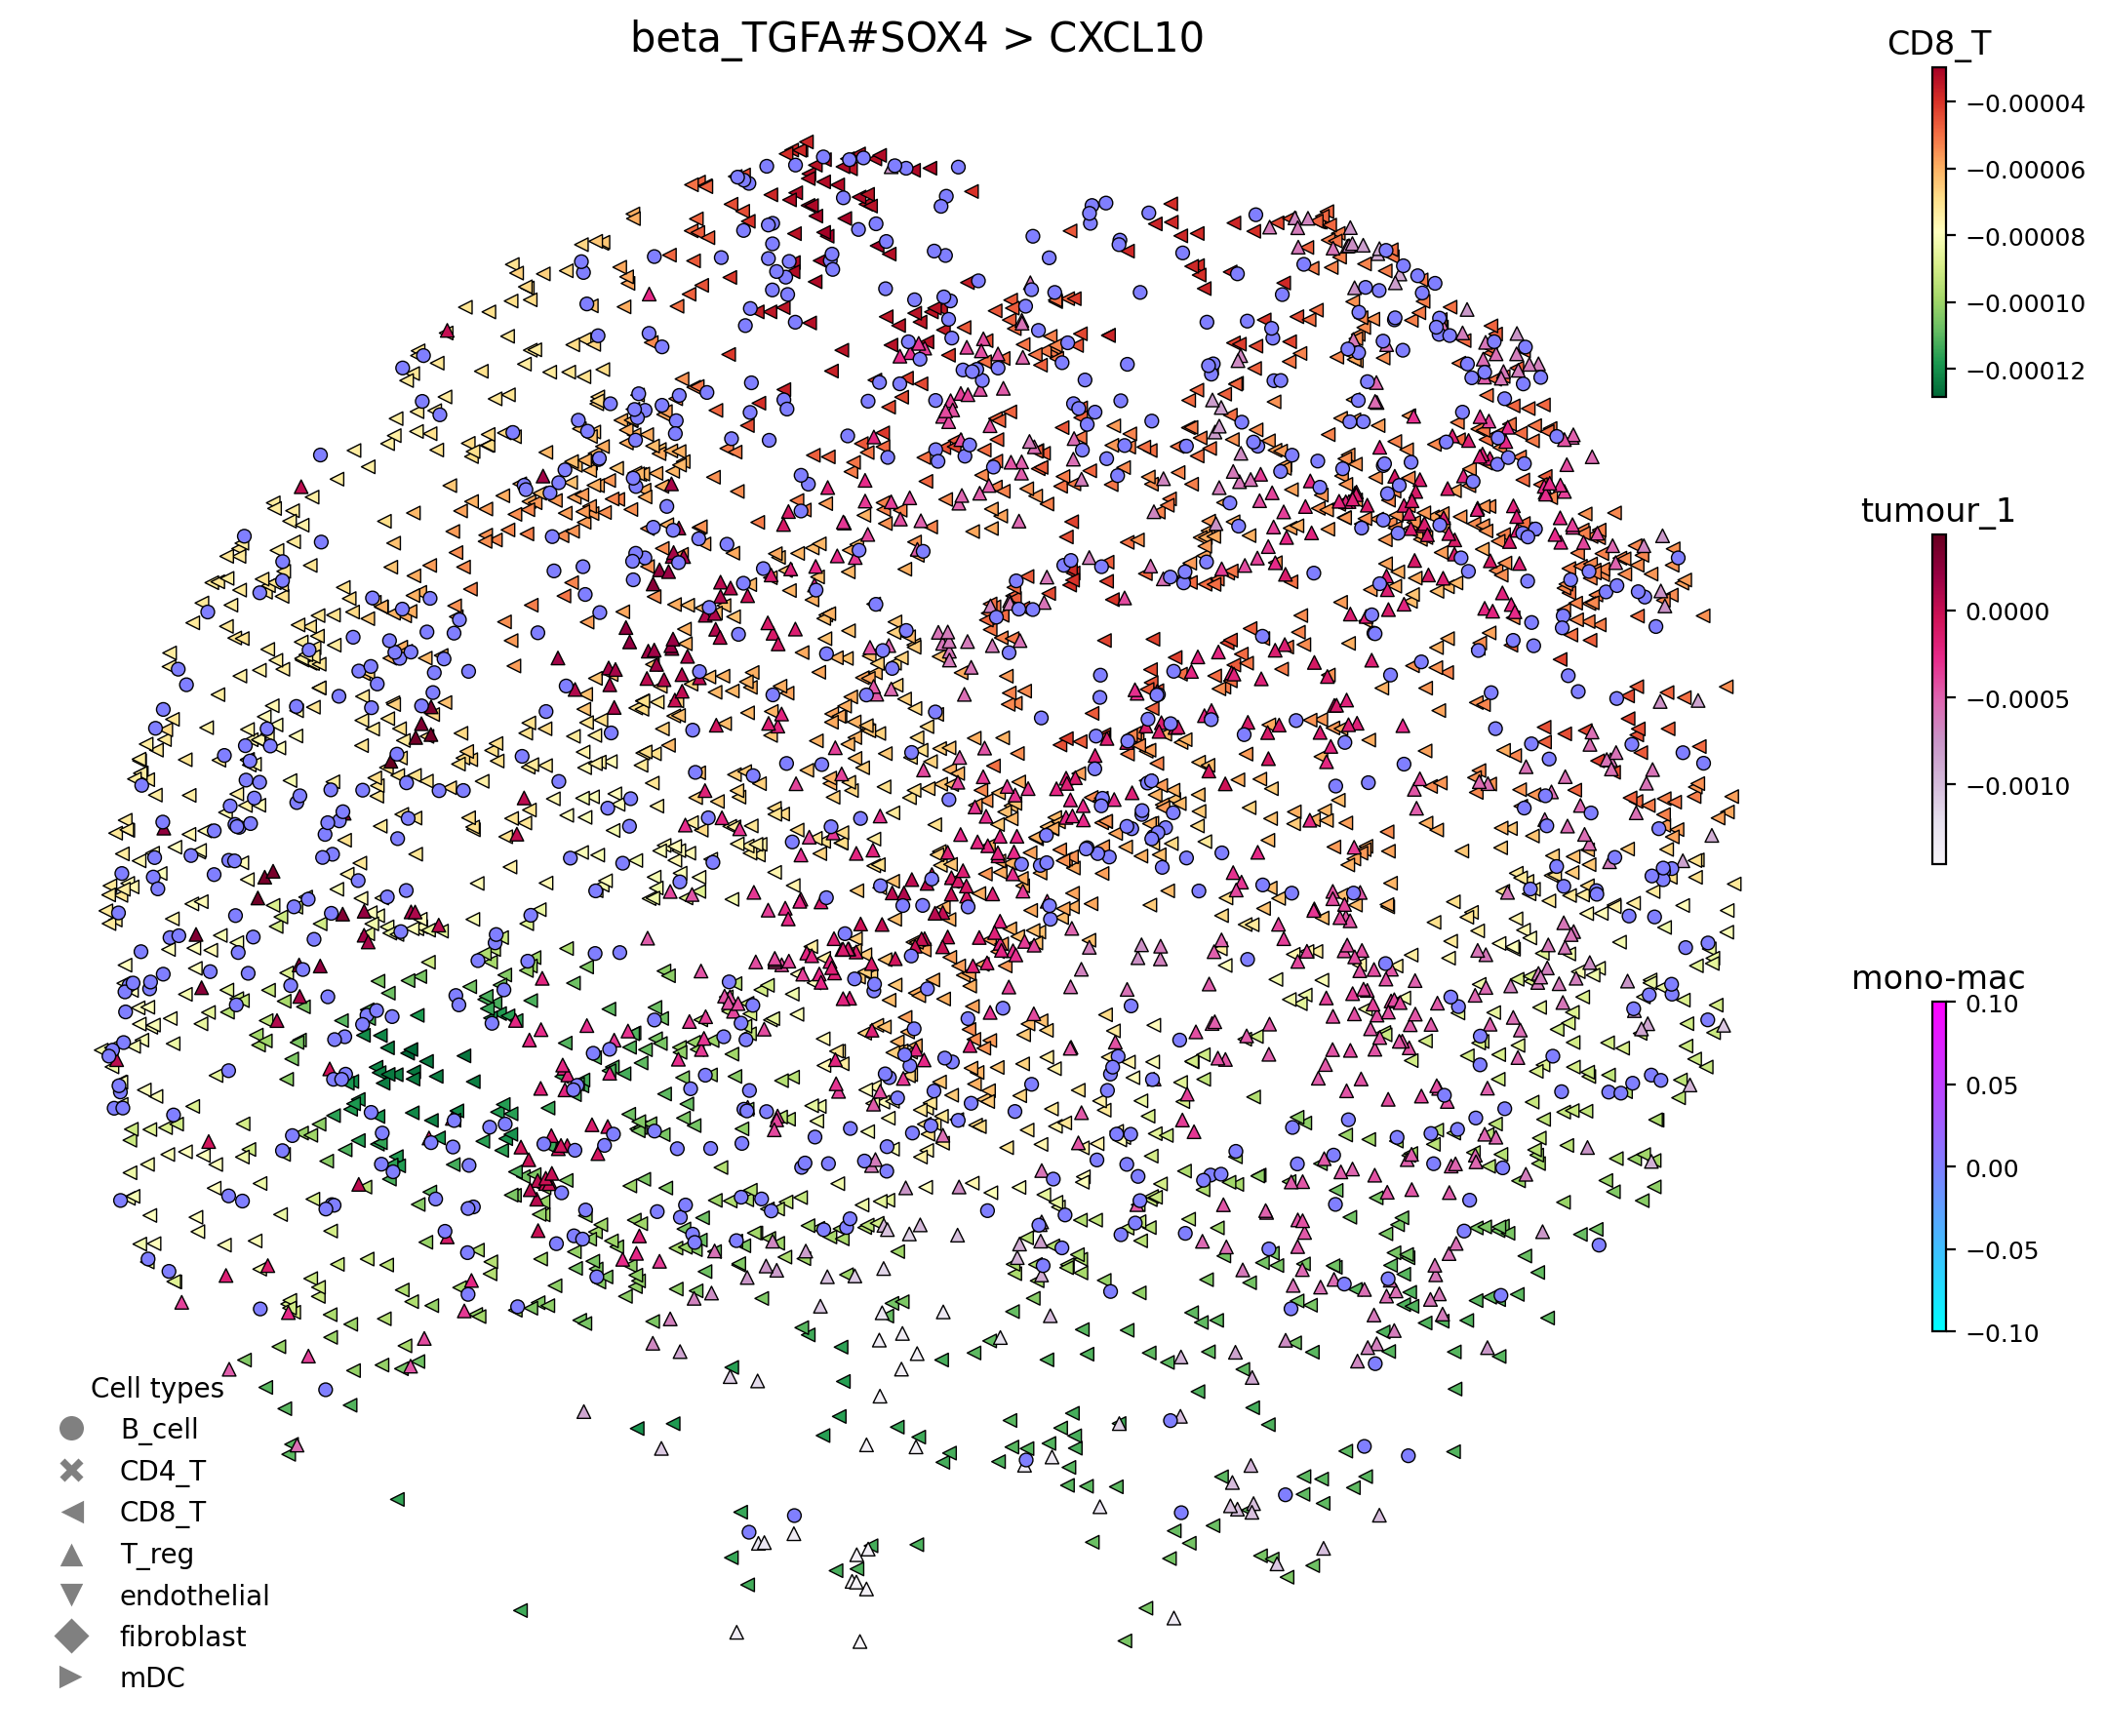

In [5]:
pythia.plot_beta_map(
    regulator='TGFA#SOX4', 
    target_gene='CXCL10',
    save_dir=f'{save_dir}/beta_maps/'
)

In [6]:
# https://www.nature.com/articles/s41586-023-06837-4/figures/3

goi = 'TGFA'
goi in pythia.adata.var_names

True

Ligand interactions: 100%|██████████| 1986/1986 [00:29<00:00, 66.71it/s]


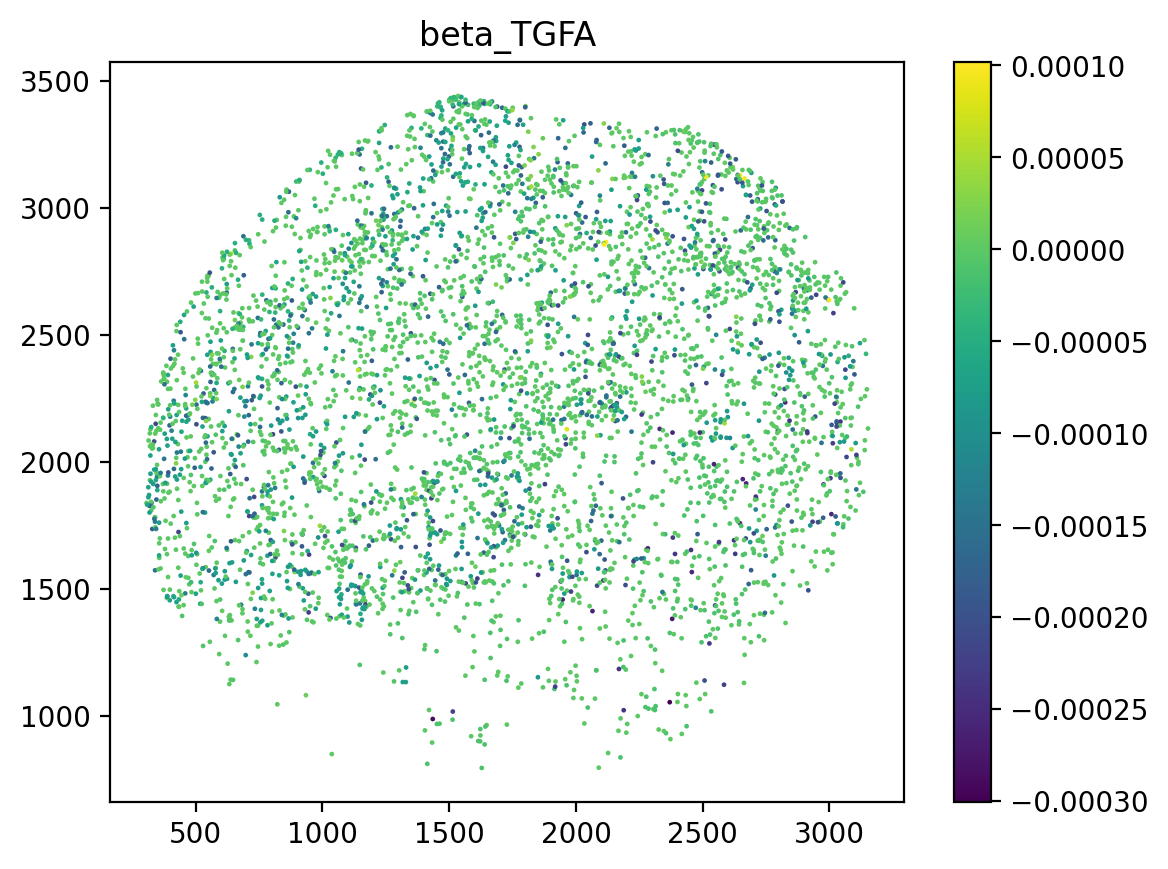

In [7]:
pythia.plot_betas_goi(goi=goi, save_dir=save_dir, use_simulated=False)

In [ ]:
pythia.perturb(target=goi, n_propagation=3, gene_expr=0)

Running simulation 1/3:  14%|█▍        | 665/4804 [00:24<03:07, 22.04it/s]

In [ ]:
pythia.plot_contour_shift(savepath=f'{save_dir}/{goi}_contour_shift.png')

In [ ]:
pythia.compute_gsea_scores(savepath=f'{save_dir}/gsea_scores.png')
pythia.compute_gsea_scores(use_simulated=True, savepath=f'{save_dir}/gsea_scores_{goi}.png')

In [ ]:
pythia.compute_gsea_scores(savepath=f'{save_dir}/gsea_scores_umap.png', show_spatial=False)
pythia.compute_gsea_scores(use_simulated=True, savepath=f'{save_dir}/gsea_scores_{goi}_spatial.png', show_spatial=False)

In [ ]:
gsea_scores = {}

for mod_name, mod_dict in pythia.gsea_modules.items():
    gene_list = mod_dict['geneSymbols']
    gene_list = [g for g in gene_list if g in pythia.adata.var_names]
    score_name = f'{mod_name}'

    sc.tl.score_genes(pythia.adata, gene_list, score_name=score_name, use_raw=False)

    gsea_scores[mod_name] = pythia.adata.obs[score_name]


In [ ]:
for mod_name in pythia.gsea_scores['observed'].index:
    if pythia.goi in pythia.gsea_modules[mod_name]['geneSymbols']:
        print(mod_name)

In [ ]:
pythia.plot_betas_goi(save_dir=save_dir, use_simulated=True)

In [ ]:
pythia.show_cluster_gex(embedding='spatial')
pythia.show_cluster_gex(embedding='FR')

pythia.show_transitions(vector_scale=60, savepath=f'{save_dir}/{goi}_transitions.png')